In [33]:
####PREDICTING AN ASTEROIDS HAZARD BASED ON IT'S VOLUME... WILL THIS BE A LINEAR RELATIONSHIP?


import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import math
%matplotlib inline

In [23]:
##let's get our asteroids dataset
impacts = pd.read_csv("C:\\Users\\fabri\\OneDrive\\Documents\\DasText\\csvFiles\\impacts.csv")
impacts.head(3)

,Object Name,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale,Maximum Torino Scale
0,2006 WP1,2017,2017,1,5.200000e-09,17.77,28.3,0.007,-8.31,-8.31,0
1,2013 YB,2017,2046,23,7.600000e-05,8.98,31.4,0.002,-6.60,-6.96,0
2,2008 US,2017,2062,30,1.600000e-05,18.33,31.4,0.002,-6.48,-6.87,0


In [42]:
##lets add a volume column:
impacts2 = impacts.rename(columns={"Asteroid Diameter (km)":"Diameter","Maximum Palermo Scale":"PalermoScale"})
impacts2['Volume'] = impacts2.apply(lambda row: (4/3)*np.pi*(row.Diameter/2)**3, axis =1)
#NOTE: np.log10 is used because math.log10 expects single value, not a series, and to scale far out data points!
impacts2['logVolume'] = impacts2.apply(lambda row: np.log10(row.Volume), axis =1)
impacts2

,Object Name,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Diameter,Cumulative Palermo Scale,PalermoScale,Maximum Torino Scale,Volume,logVolume
0,2006 WP1,2017,2017,1,5.200000e-09,17.77,28.3,0.007,-8.31,-8.31,0,1.795944e-07,-6.745707
1,2013 YB,2017,2046,23,7.600000e-05,8.98,31.4,0.002,-6.60,-6.96,0,4.188790e-09,-8.377911
2,2008 US,2017,2062,30,1.600000e-05,18.33,31.4,0.002,-6.48,-6.87,0,4.188790e-09,-8.377911
3,2010 VR139,2017,2076,24,2.000000e-07,4.99,26.7,0.016,-6.83,-6.95,0,2.144661e-06,-5.668641
4,2015 ME131,2017,2096,85,2.300000e-08,19.46,19.2,0.497,-3.85,-4.30,0,6.427880e-02,-1.191932
...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,2014 KW76,2115,2115,1,2.800000e-07,15.00,28.0,0.008,-8.22,-8.22,0,2.680826e-07,-6.571731
679,2012 FN,2115,2115,1,2.300000e-08,3.27,29.2,0.005,-10.18,-10.20,0,6.544985e-08,-7.184091
680,101955 Bennu (1999 RQ36),2175,2199,78,3.700000e-04,5.99,20.2,0.490,-1.71,-2.32,(*),6.160087e-02,-1.210413
681,410777 (2009 FD),2185,2198,7,1.600000e-03,15.87,22.1,0.160,-1.78,-1.83,(*),2.144661e-03,-2.668641


Text(0, 0.5, 'PALERMO HAZARD VALUE')

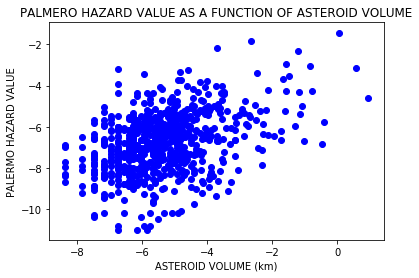

In [43]:
#log(Volume) vs Maximum Palermo Scale
plt.scatter(impacts2.logVolume,impacts2.PalermoScale,color="blue") 
plt.title("PALMERO HAZARD VALUE AS A FUNCTION OF ASTEROID VOLUME")
plt.xlabel("ASTEROID VOLUME (km)")
plt.ylabel("PALERMO HAZARD VALUE")

In [8]:
####GREAT! NOW LET'S SPLIT THE DATA INTO TRAINING AND TESTING VALUES

In [44]:
##we need to create a mask to split the data in to 80% train, 20% test

msk = np.random.rand(len(impacts2)) < 0.8 #doing this assigns a "true or false" for each row 
train = impacts2[msk] #our training data will be all those "trues"
test = impacts2[~msk] #all the falses

Text(0, 0.5, 'PALERMO HAZARD VALUE')

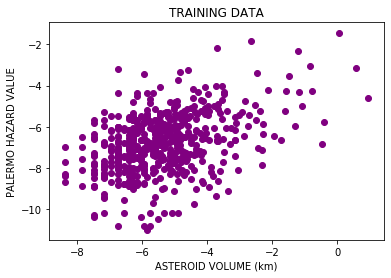

In [46]:
#now let's scatter plot the part of the data we selected as the training data! for engine size
plt.scatter(train.logVolume, train.PalermoScale,  color='purple')
plt.title("TRAINING DATA")
plt.xlabel("ASTEROID VOLUME (km)")
plt.ylabel("PALERMO HAZARD VALUE")

In [47]:
####let's make a linear regression model!
from sklearn import linear_model
regr = linear_model.LinearRegression() #makes the regression object
train_x = np.asanyarray(train[['logVolume']]) #makes the independent column into numpy array
train_y = np.asanyarray(train[['PalermoScale']]) #makes the dependent column into numpy array
regr.fit(train_x, train_y) #fits the data using the regr object

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.42899458]]
Intercept:  [-4.50274982]


Text(0, 0.5, 'PALERMO HAZARD VALUE')

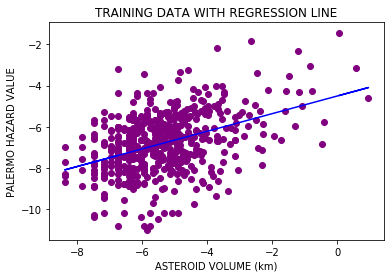

In [48]:
####PLOTTING THE FIT LINE OVER THE DATA
plt.scatter(train.logVolume, train.PalermoScale,  color='purple')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-b')
plt.title("TRAINING DATA WITH REGRESSION LINE")
plt.xlabel("ASTEROID VOLUME (km)")
plt.ylabel("PALERMO HAZARD VALUE")

In [49]:
####Evaluation

#now we must evaluate the model using evaluation metrics
## we will use MSE

#let's import r2_score
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['logVolume']]) #make numpy arrays from out test set like we did for training
test_y = np.asanyarray(test[['PalermoScale']])
test_y_hat = regr.predict(test_x) #makes a list of predicted y's, or hazard scales, given x's

##some evaluation metrics:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))

##our R^2 result
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) ) #how well predicted y's fall in with the tested y's

Mean absolute error: 1.09
Residual sum of squares (MSE): 1.93
R2-score: -4.58


In [ ]:
### well that's not very good is it... NO CORRELATION BETWEEN VOLUME AND HAZARD LEVEL ON THE PALERMO SCALE!